# Maps

Mark Klik & Misja Mikkers

# Packages

## Installing packages

First, we have to install some packages to create custom maps:


In [28]:
install.packages('maptools', repos='http://cran.us.r-project.org')
install.packages('rgdal', repos='http://cran.us.r-project.org')
install.packages('rgeos', repos='http://cran.us.r-project.org')


Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)
Warning message in install.packages("maptools", repos = "http://cran.us.r-project.org"):
"'lib = "/usr/local/lib/R/site-library"' is not writable"

ERROR: Error in install.packages("maptools", repos = "http://cran.us.r-project.org"): unable to install packages


## Packages:

In [2]:
install.packages("../Package//thematicmaps_2.1.tar.gz", repos = NULL, type = "source")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)
Warning message in install.packages("../Package//thematicmaps_2.1.tar.gz", repos = NULL, :
"'lib = "/usr/local/lib/R/site-library"' is not writable"

ERROR: Error in install.packages("../Package//thematicmaps_2.1.tar.gz", repos = NULL, : unable to install packages


In [3]:
library(thematicmaps)
library(tidyverse)
library(stringr)

Loading required package: ggplot2
Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> tibble  1.4.2     <U+221A> purrr   0.2.4
<U+221A> tidyr   0.8.0     <U+221A> dplyr   0.7.4
<U+221A> read

# First map

To create maps you need polygon-data (data describing the polygons that constitute the map expressed in _x_ and _y_ coordinates). It is possible to buy this data from commercial parties, but more and more polygon data are published as open source data. For this course we used open source data from the CBS (central bureau of statitics in the Netherlands) and [Imergis](http://www.imergis.nl/asp/47.asp). To save you time, we converted the polygon data to _csv_ format.


For our first basic map, we need some data about the Netherlands. The polygon data from municipalities were previously saved as a _csv_ in the folder "Sourcedata".

In [5]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


We will use package `thematicmaps` to make a map of the Netherlands. The package `thematicmaps` is an extension to the `ggplot2` package.

The command `MapPlot()` creates the appropriate _theme_ in ggplot (basically everything white and square axis scales). With the command
`AddMapLayer(MapPlot(), name_of_your_polygon_data)`, we can add a map to the drawing canvas:


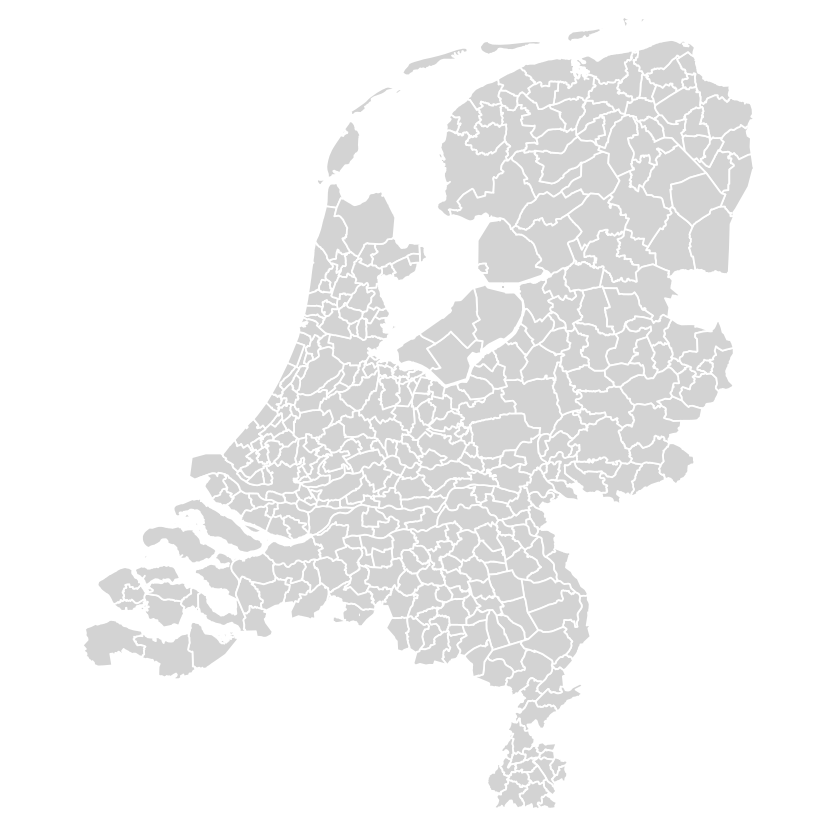

In [6]:
AddMapLayer(MapPlot(), map_municipal)

## Add information to the map:

We will now add some information to the map. We will read a _csv_ file with some municapal data and calculate the percentage of females in each municipality. To do this, we need some commands of `dplyr` (which we will discuss in the next lecture).

In [9]:
pop_data <- read.csv2("../Sourcedata/nld_municipal_data.csv")
map_info <- pop_data %>%
    select(name, pop_65plus)

str(map_info)
head(map_info)


'data.frame':	403 obs. of  2 variables:
 $ name      : Factor w/ 403 levels "'s-Gravenhage",..: 20 28 32 320 79 127 128 139 163 186 ...
 $ pop_65plus: int  22 19 24 18 23 12 16 26 21 20 ...


name,pop_65plus
Appingedam,22
Bedum,19
Bellingwedde,24
Ten Boer,18
Delfzijl,23
Groningen,12


Now we can add a data-layer by using the `AddMapLayer()` command. With `AddMapLayer()`, data from two datasets is combined internally. To do that, the first columns of the dataframes should have identical purpose. Please check dat 'map_info' and 'map_municipal' can be merged by the variable "name"

Please note, that because the package `thematicmaps` is based on `ggplot2`, we can add `ggplot2` commands. In this case, we have added a new legend title. Because the title is very long, we break the title into 2 substrings:


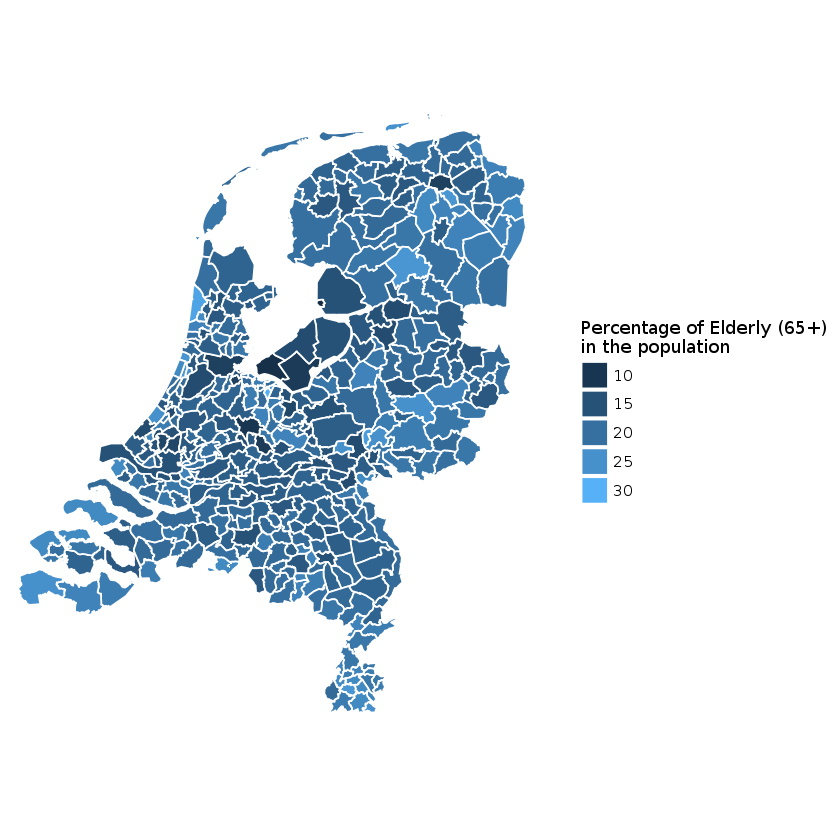

In [10]:
AddMapLayer(MapPlot(), map_municipal, map_info) +
  guides(fill = guide_legend(title = "Percentage of Elderly (65+)\nin the population"))

We can also add points to a map.

First we read the polygon data of the PC4 level as pc4_locations. We have prepared this in a _csv_ file "nld_pc4_locations.csv".

The _X_ and _Y_ colums have to be numeric. 

Since we only want a few points, we will just take a sample of the data and call this "sample_locations".

In [11]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


We will now take a sample of 10 locations:

In [12]:
sample_locations <- pc4_locations %>%
  sample_n(10, replace = FALSE)

head(sample_locations)

,PC4,X,Y
1463,4385,28837.71,387476.3
2961,7887,258648.98,526115.8
3957,9831,227430.62,585947.0
2707,7395,200099.91,472402.2
3557,9083,183321.89,581676.4
4017,9943,258348.66,582122.0


We can now add our sample locations to the map using `AddPointsLayer()`:

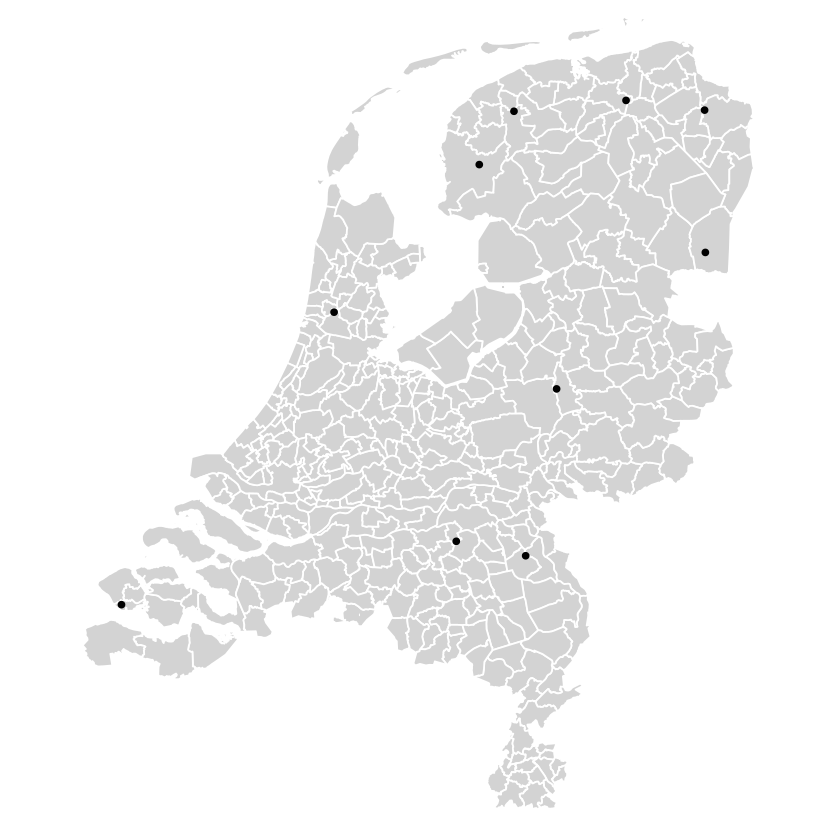

In [13]:
# display map with points
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations)

We can add a _Type_ to the specific locations:

In [14]:
sample_color <- sample_locations %>%
  mutate(Type = as.factor(sample(1:3, 10, replace = TRUE))) %>%
  select(PC4, Type)

And then add a color to the points based on their type:

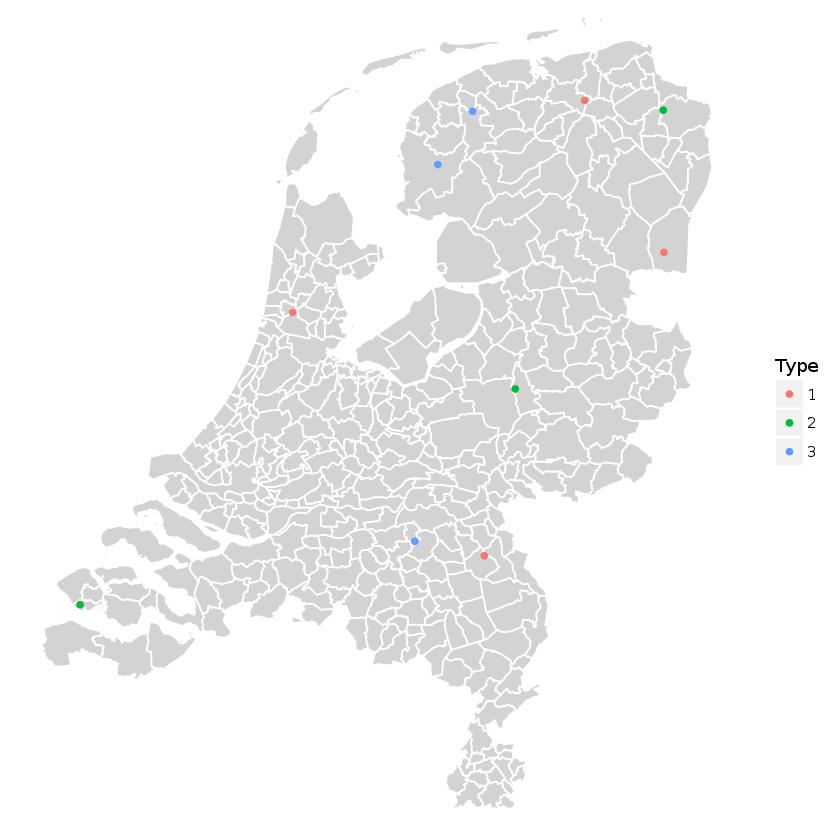

In [15]:
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations, sample_color, columnNameColor = "Type") 

Finally, we may want to add text to the map. Again, we will generate the data:

In [17]:
sample_text <- sample_locations%>%
  mutate(Label = c("A", "B", "C", "D", "E", "F", "G", "H", "I" ,"J")) %>%
  select(PC4, Label)

We can now add text to the map with the command `AddTextLayer()`


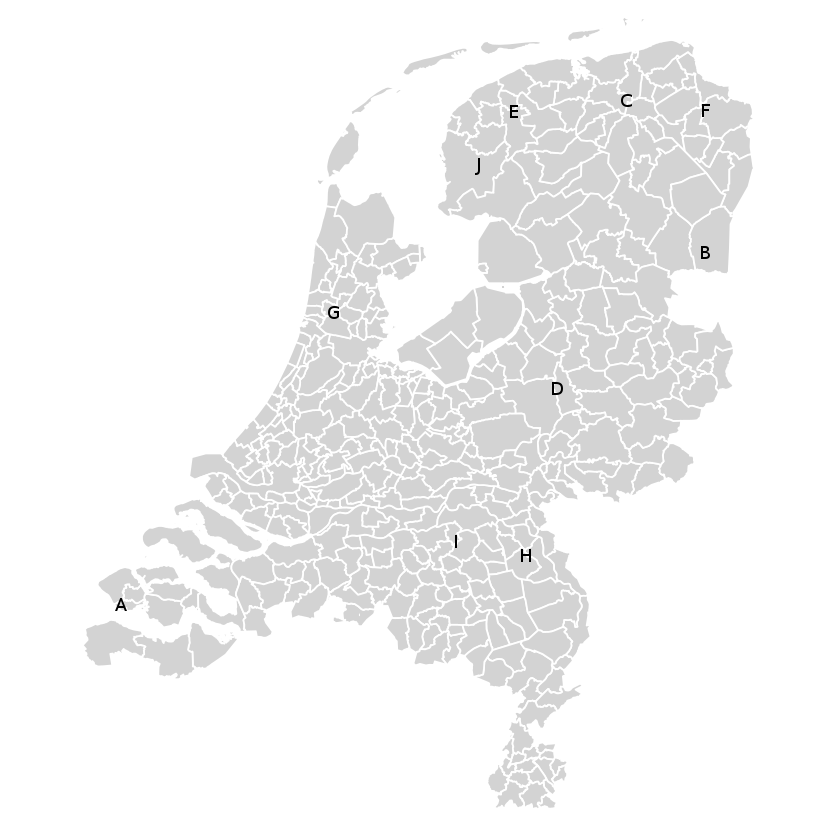

In [18]:
AddMapLayer(MapPlot(), map_municipal) %>%
    AddTextLayer(sample_locations, sample_text)

# Assignment

Create a map with hospital data. We have prepared a file _hospital.csv_ that contains data on hospitals.

## Assignment 1:

Read the data in as "hosp_data" and inspect the first rows:


In [20]:
hosp_data <- read.csv2("../Sourcedata/hospital.csv")
head(hosp_data)

PC4,Hospital_type,Name
2692,Buitenpolikliniek,HagaZiekenhuis Zorgplein Westland
2597,Buitenpolikliniek,Bronovo Buitenpoli Hubertusduin
2241,Buitenpolikliniek,Bronovo Buitenpoli Wassenaar
3191,Buitenpolikliniek,Franciscus Hoogvliet
6532,Algemeen ziekenhuis,Canisius-Wilhelmina Ziekenhuis
6651,Buitenpolikliniek,Canisius-Wilhelmina Ziekenhuis Druten


## Assignment 2:

Merge the data (using `dplyr`) from _hosp_data_ and _pc4_locations_ in a new dataframe _hosp_loc_, so that only data in both data frames are retained. Check the structure of the data.


In [24]:
hosp_loc <- merge(hosp_data, pc4_locations, by = "PC4")
str(hosp_loc)
head(hosp_loc)

'data.frame':	264 obs. of  5 variables:
 $ PC4          : int  1012 1034 1061 1066 1066 1081 1087 1091 1105 1105 ...
 $ Hospital_type: Factor w/ 4 levels "Academisch ziekenhuis",..: 3 2 2 2 2 1 3 2 4 1 ...
 $ Name         : Factor w/ 265 levels "Academisch Medisch Centrum",..: 155 26 157 22 119 215 154 156 61 1 ...
 $ X            : num  121613 122762 117819 116334 116334 ...
 $ Y            : num  487555 490997 487403 483981 483981 ...


PC4,Hospital_type,Name,X,Y
1012,Buitenpolikliniek,Onze Lieve Vrouwe Gasthuis Spuistraat,121612.8,487555.4
1034,Algemeen ziekenhuis,BovenIJ Ziekenhuis,122761.7,490996.5
1061,Algemeen ziekenhuis,Onze Lieve Vrouwe Gasthuis locatie West,117819.2,487403.0
1066,Algemeen ziekenhuis,Antoni van Leeuwenhoek,116333.5,483981.5
1066,Algemeen ziekenhuis,MC Slotervaart,116333.5,483981.5
1081,Academisch ziekenhuis,VU Medisch Centrum,118277.6,482449.5



## Assignment 3:

Create a map with the hospital locations as points and color the points according to the _type_ of hospital.



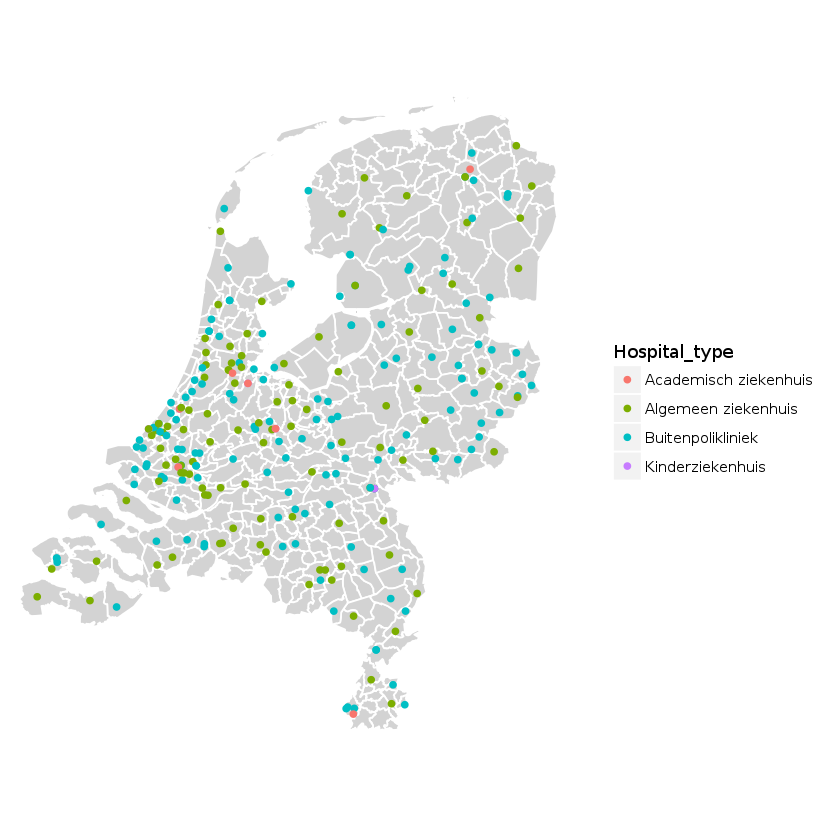

In [27]:
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(hosp_loc, columnNameColor = "Hospital_type") 

End Notebook